---

<center> <h1> <span style='color:#292D78'> CREWES Data Science Training </span> </h1> </center>

<center> <h2> <span style='color:#DF7F00'> Lab 4: Boston Housing Price Prediction </span> </h2> </center>

---

In this [Jupyter Notebook](https://jupyter.org/install) we will predict the **Boston housing price** using regression models.

# Boston Housing Price

### Context

Investments in real state is reasonable stable, and predicting housing prices based on the house's feature is of extremely importance to know in which region to invest expecting a higher profit. In this project, you will identify the qualities in a house from Boston and predict its retail price.

### Objective

Analyze the Boston housing dataset, identify which house qualities impact more in the price of the house, and train and test a regression model to predict the price of houses.

### Content

You are provided with house prices and features in Boston evaluated from 2014 to 2015.

> File: BostonHousing.csv

* **id**: identification of the house
* **date**: date of the house evaluation
* **price**: price of the house in US$
* **bedrooms**: number of bedrooms
* **bathrooms**: number of bathrooms
* **sqft_living**: square footage of the living area
* **sqft_lot**: square footage of the lot
* **floors**: number of floors
* **waterfront**: if it contains a waterfront
* **view**: if it has a good view
* **condition**: house's condition
* **grade**: house's score
* **sqft_above**: square footage of the upper level (if any)
* **sqft_basement**: square footage of the basement (if any)
* **yr_built**: year built
* **yr_renovated**: year renovated (if any)
* **zipcode**: zipcode
* **lat**: latitude
* **long**: longitude
* **sqft_living15**: average square footage of the living area of the 15 nearest houses
* **sqft_lot15**: average square footage of the lot of the 15 nearest houses

Loading packages:

In [1]:
!ls -l

total 9804
-rwx------+ 1 Nusrat None 5465935 May 30 09:07 01-House_Price.ipynb
-rwx------+ 1 Nusrat None 2180402 May 30 09:07 01_House_Price_New.ipynb
-rwx------+ 1 Nusrat None 2384036 May 21 07:30 BostonHousing.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Core
import numpy as np
import pandas as pd

# Supressing scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# print plots
%matplotlib inline 

# Machine Learning models and tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.neural_network import MLPRegressor

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score

# To supress warnings and deprecated messages
import warnings

warnings.filterwarnings("ignore")

Reading Boston Hoursing file:

In [4]:
data = pd.read_csv("BostonHousing.csv")
print(data.shape)
data

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3,2.50,1530,1131,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4,2.50,2310,5813,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2,0.75,1020,1350,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3,2.50,1600,2388,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


The data contains $21613$ rows and $21$ columns.

Checking data types:

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

There are no missing values in the data. Except for `date`, that is of type *object*, all other columns are numeric.

* `waterfront` sets if the house contains a water exit or not, though a boolean scenario
* `view`, `condition`, and `grade` should be categorical

In [7]:
data.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [9]:
print(data.floors.unique())
print(data.waterfront.unique())
print(data.view.unique())
print(data.condition.unique())
print(data.grade.unique())

[1.  2.  1.5 3.  2.5 3.5]
[0 1]
[0 3 4 2 1]
[3 5 4 1 2]
[ 7  6  8 11  9  5 10 12  4  3 13  1]


Checking for duplicates:

In [10]:
data.duplicated().sum()

0

In [11]:
data[data.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


There are not duplicated rows.

Checking again for missing:

In [12]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values.

Let's drop the columns `id`, `date`, `zipcode` as we won't be using them:

In [13]:
data.drop(columns = ["id", "date"], inplace = True)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.00,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,400000.00,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,402101.00,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,400000.00,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


### Converting Columns Types

* `waterfront` > boolean
* `view` > category
* `condition` > category
* `grade` > category

In [14]:
data["waterfront"] = data["waterfront"].astype("bool")

cat = ["view", "condition", "grade"]

for i in cat:
    data[i] = data[i].astype("category")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21613 non-null  float64 
 1   bedrooms       21613 non-null  int64   
 2   bathrooms      21613 non-null  float64 
 3   sqft_living    21613 non-null  int64   
 4   sqft_lot       21613 non-null  int64   
 5   floors         21613 non-null  float64 
 6   waterfront     21613 non-null  bool    
 7   view           21613 non-null  category
 8   condition      21613 non-null  category
 9   grade          21613 non-null  category
 10  sqft_above     21613 non-null  int64   
 11  sqft_basement  21613 non-null  int64   
 12  yr_built       21613 non-null  int64   
 13  yr_renovated   21613 non-null  int64   
 14  zipcode        21613 non-null  int64   
 15  lat            21613 non-null  float64 
 16  long           21613 non-null  float64 
 17  sqft_living15  21613 non-null  

Statistical description of the data:

In [21]:
df = pd.DataFrame(["Bad", "Fair", "Good", "Bad"], columns=["View"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   View    4 non-null      object
dtypes: object(1)
memory usage: 160.0+ bytes


In [23]:
df["View"] = pd.Categorical(df["View"]).codes
# back
#df["View"] = df["View"].astype("category") 
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   View    4 non-null      int8 
dtypes: int8(1)
memory usage: 132.0 bytes


,View
0,0
1,1
2,2
3,0


In [ ]:
test = ["<1000" if x < 1000 else ">=1000" if x > 1000 else "median" if x == data["sqft_living"].median() else None for x in data["sqft_living"] ]
test[test == "median"]

'>=1000'

In [27]:
data["house_age"] = 2022 - data["yr_built"]

In [28]:
data["renovation_age"] = [2022 - x if x > 0 else 0 for x in data["yr_renovated"]]

In [29]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,renovation_age
0,221900.00,3,1.00,1180,5650,1.00,False,0,3,7,...,0,1955,0,98178,47.51,-122.26,1340,5650,67,0
1,538000.00,3,2.25,2570,7242,2.00,False,0,3,7,...,400,1951,1991,98125,47.72,-122.32,1690,7639,71,31
2,180000.00,2,1.00,770,10000,1.00,False,0,3,6,...,0,1933,0,98028,47.74,-122.23,2720,8062,89,0
3,604000.00,4,3.00,1960,5000,1.00,False,0,5,7,...,910,1965,0,98136,47.52,-122.39,1360,5000,57,0
4,510000.00,3,2.00,1680,8080,1.00,False,0,3,8,...,0,1987,0,98074,47.62,-122.05,1800,7503,35,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.00,3,2.50,1530,1131,3.00,False,0,3,8,...,0,2009,0,98103,47.70,-122.35,1530,1509,13,0
21609,400000.00,4,2.50,2310,5813,2.00,False,0,3,8,...,0,2014,0,98146,47.51,-122.36,1830,7200,8,0
21610,402101.00,2,0.75,1020,1350,2.00,False,0,3,7,...,0,2009,0,98144,47.59,-122.30,1020,2007,13,0
21611,400000.00,3,2.50,1600,2388,2.00,False,0,3,8,...,0,2004,0,98027,47.53,-122.07,1410,1287,18,0


In [30]:
print(data.renovation_age.unique())

[ 0 31 20 12 23 30  9 28 44 17 14 19 38 68  8 11 48 39 77 32 34 65 45 41
 27 22 24 52 33 18 36 13 15 35 49 16 37 21 42 51 43 25 72 53 74  7 54 10
 59 71 29 60 26 50 69 67 40 66 82 46 76 47 64 58 63 62 55 57 88 78]


In [31]:
print(data.house_age.unique())

[ 67  71  89  57  35  21  27  59  62  19  80  95  45 122  43  28 106 101
  53  75  54  37  81 107 113  74  17  93  41  92 118  26  22  38   8 100
  63  56  69  72  14  31  68  49  97  33  50  36  66  20  30  58  70  61
  16  34  60  83  76  55  47  42 112  39  44 117  51  12  77  98  32 108
  96  18  99  15  46  73  23 121  29 102  25  79  65  82 104  94  48 111
  86  85  40 114  91  24 109   9 115  64  10 110  11 105  90  78 120  13
 119  52   7  88  84 103 116  87]


In [32]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.00,540088.14,367127.20,75000.00,321950.00,450000.00,645000.00,7700000.00
bedrooms,21613.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21613.00,2.11,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21613.00,2079.90,918.44,290.00,1427.00,1910.00,2550.00,13540.00
sqft_lot,21613.00,15106.97,41420.51,520.00,5040.00,7618.00,10688.00,1651359.00
floors,21613.00,1.49,0.54,1.00,1.00,1.50,2.00,3.50
sqft_above,21613.00,1788.39,828.09,290.00,1190.00,1560.00,2210.00,9410.00
sqft_basement,21613.00,291.51,442.58,0.00,0.00,0.00,560.00,4820.00
yr_built,21613.00,1971.01,29.37,1900.00,1951.00,1975.00,1997.00,2015.00
yr_renovated,21613.00,84.40,401.68,0.00,0.00,0.00,0.00,2015.00


* *price* has a minimum of $75k$ and a maximum of $7.7M$, and it may have a right skewed distribution
* Up to 50% of the houses have at least 3 bedrooms, and there is a maximum na 33 bedrooms
* At least 50% of the houses have 2.25 or more bathrooms
* Most of the houses have equal or more than 1910 sqft of living area
* Mean of lot square footage is larger than the 75% quantile, suggesting a strongly right skewed distribution
* The oldest house in the data was built in 1900 while the newest one was built in 2015
* There are a large number of houses that were never renovated

In [33]:
data.describe(exclude = np.number).T

,count,unique,top,freq
waterfront,21613,2,False,21450
view,21613,5,0,19489
condition,21613,5,3,14031
grade,21613,12,7,8981


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   price           21613 non-null  float64 
 1   bedrooms        21613 non-null  int64   
 2   bathrooms       21613 non-null  float64 
 3   sqft_living     21613 non-null  int64   
 4   sqft_lot        21613 non-null  int64   
 5   floors          21613 non-null  float64 
 6   waterfront      21613 non-null  bool    
 7   view            21613 non-null  category
 8   condition       21613 non-null  category
 9   grade           21613 non-null  category
 10  sqft_above      21613 non-null  int64   
 11  sqft_basement   21613 non-null  int64   
 12  zipcode         21613 non-null  int64   
 13  lat             21613 non-null  float64 
 14  long            21613 non-null  float64 
 15  sqft_living15   21613 non-null  int64   
 16  sqft_lot15      21613 non-null  int64   
 17  house_age   

* Most of the houses have no water front, no good view, are of average condition, and received an average grade.

In [38]:
data.drop(["yr_built", "yr_renovated"], axis = 1, inplace = True)
data

KeyError: "['yr_built' 'yr_renovated'] not found in axis"

# EDA

## Univariate Analysis

### Numeric Features

Let's check the distribution of the numeric columns.

In [39]:
def hist_box(data, feature, figsize=(12, 7)):

    # Subplot canvas
    fig, (ax_box, ax_hist) = plt.subplots(nrows = 2, sharex = True, gridspec_kw = {"height_ratios": (0.25, 0.75)}, figsize = figsize)

    # Boxplot on top
    sns.boxplot(data = data, x = feature, ax = ax_box, showmeans = True, color = "pink")  # boxplot will be created and a star will indicate the mean value of the column
    
    # Histogram on bottom
    sns.histplot(data = data, x = feature, ax = ax_hist) # histogram will be created and

    # Add mean and median to histogram
    ax_hist.axvline(data[feature].mean(), color = "green") # mean
    ax_hist.axvline(data[feature].median(), color = "orange") # median

    # Title
    fig.suptitle("Distribution of " + feature, fontsize=16)

In [40]:
# Get numerical columns:
cols_num = list(data.select_dtypes(include = ["int64", "float64"]))

print(cols_num)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'house_age', 'renovation_age']


Now let's plot all the numerical columns using a for loop:

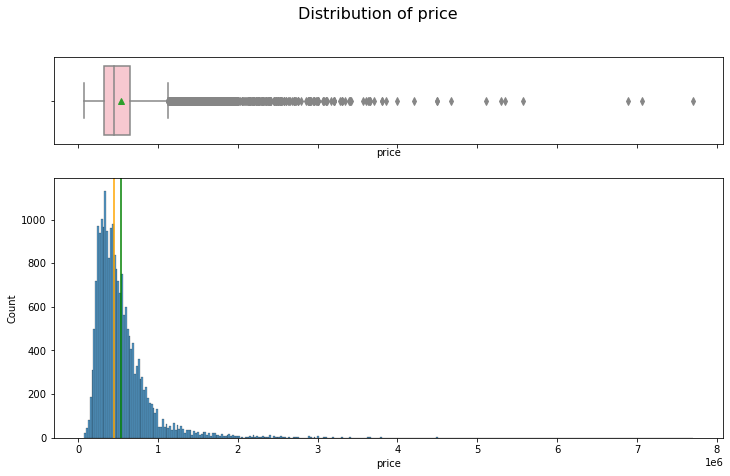

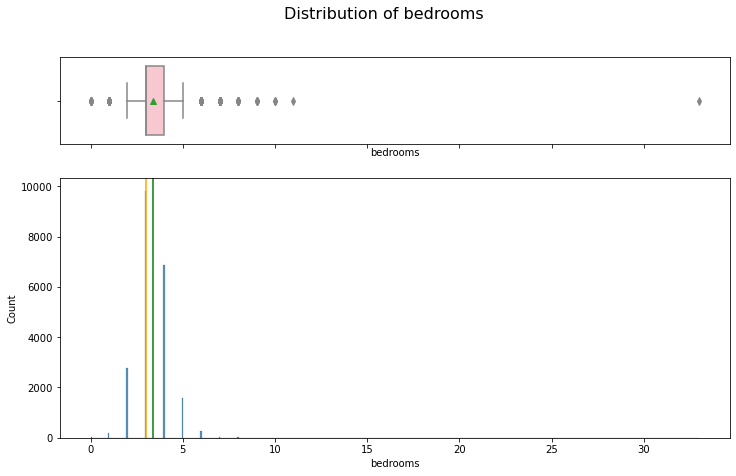

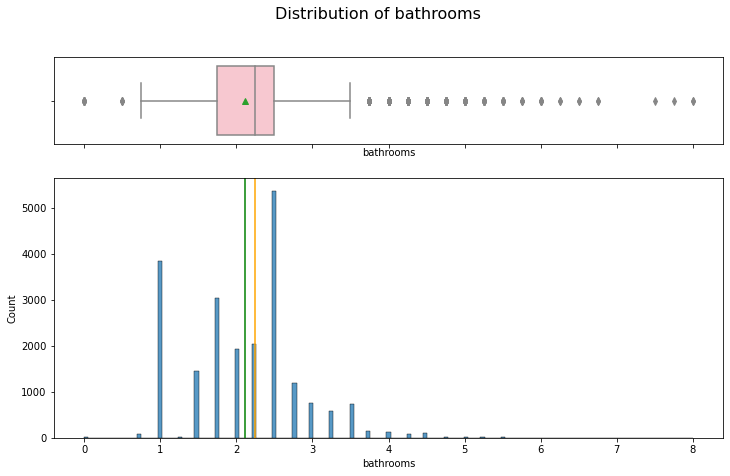

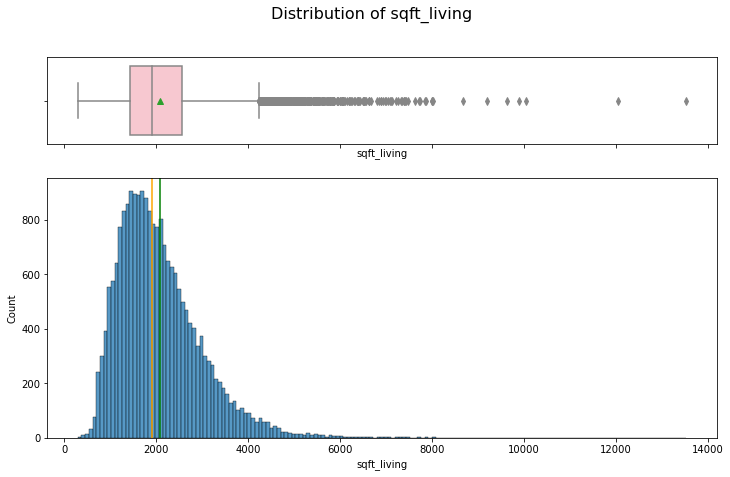

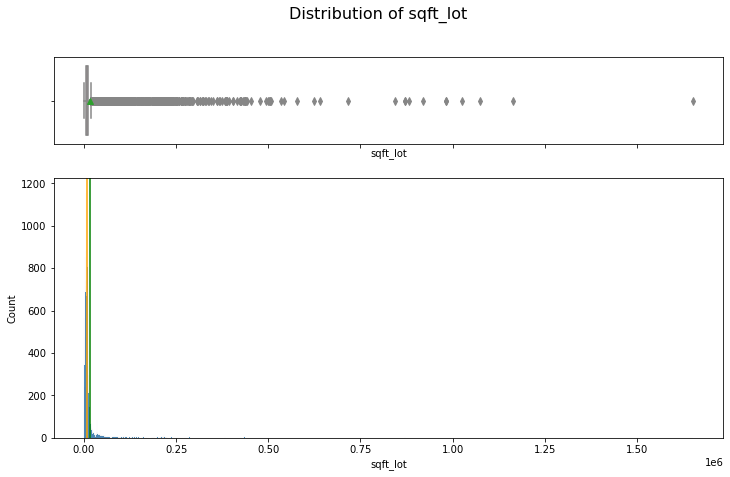

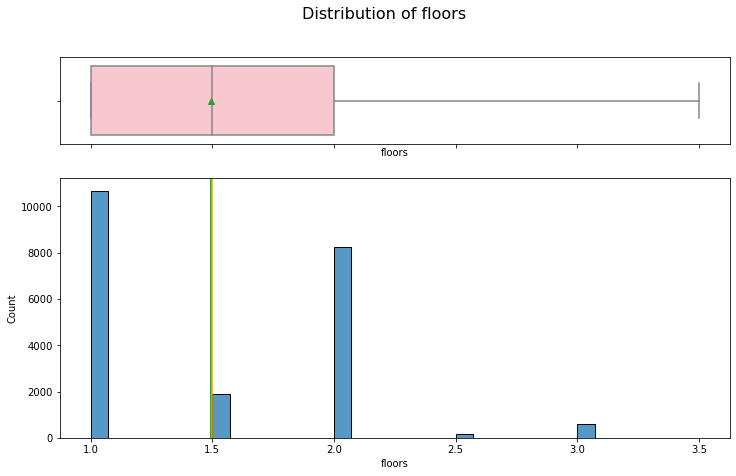

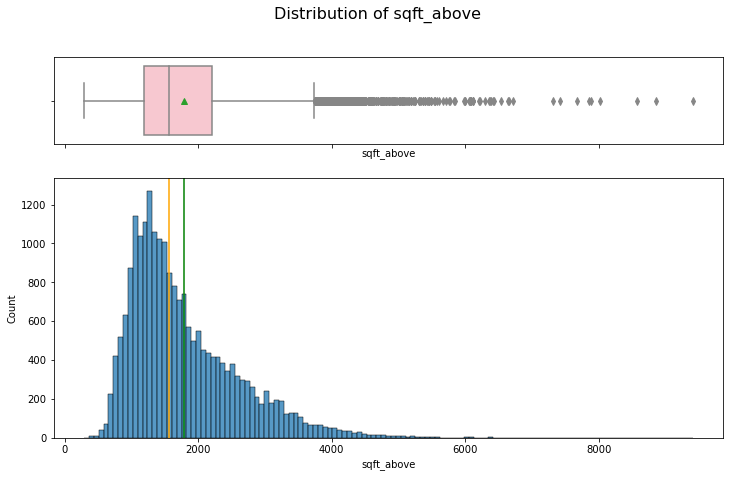

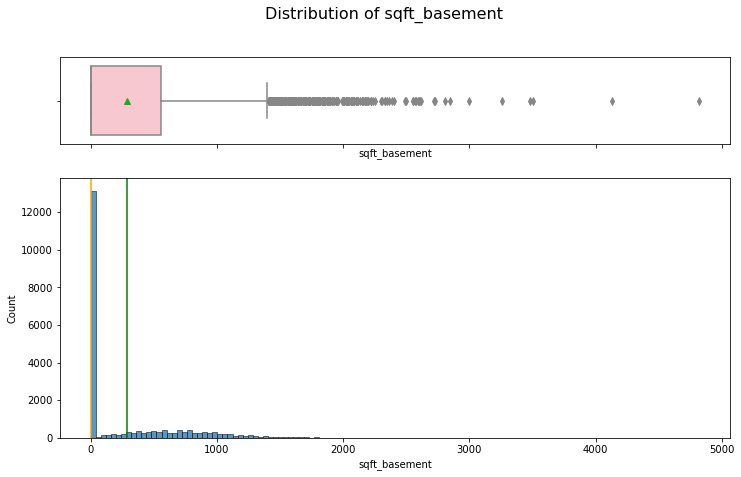

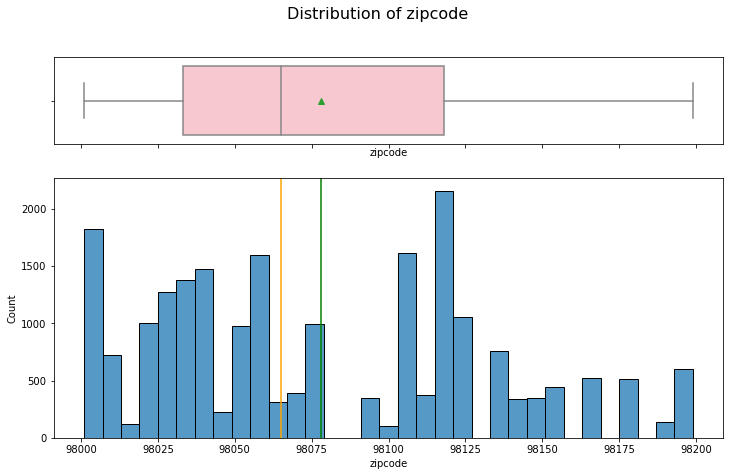

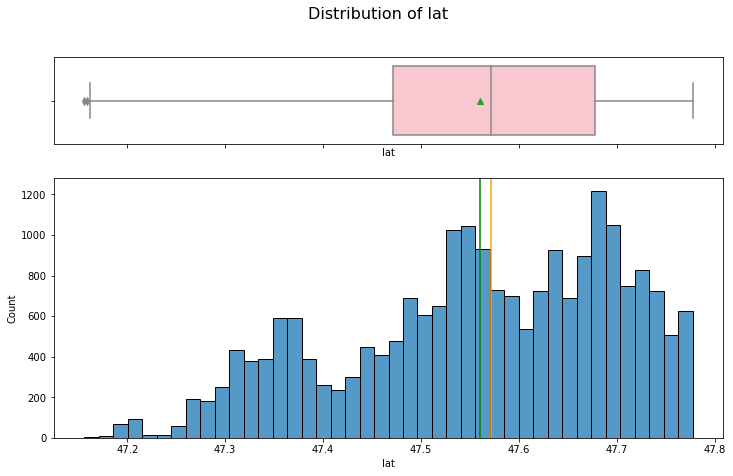

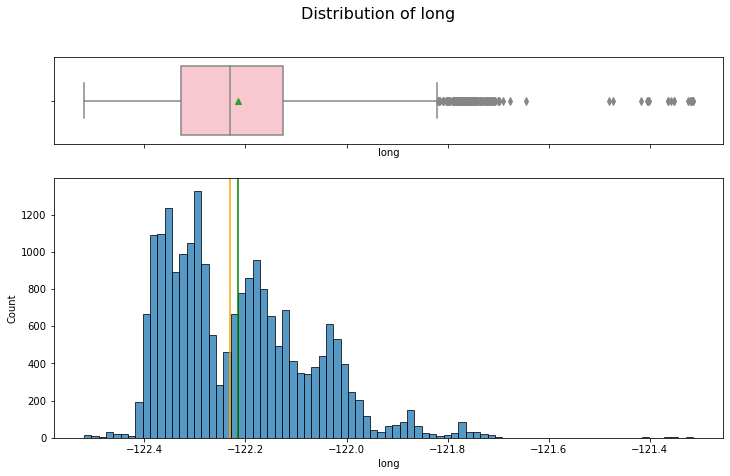

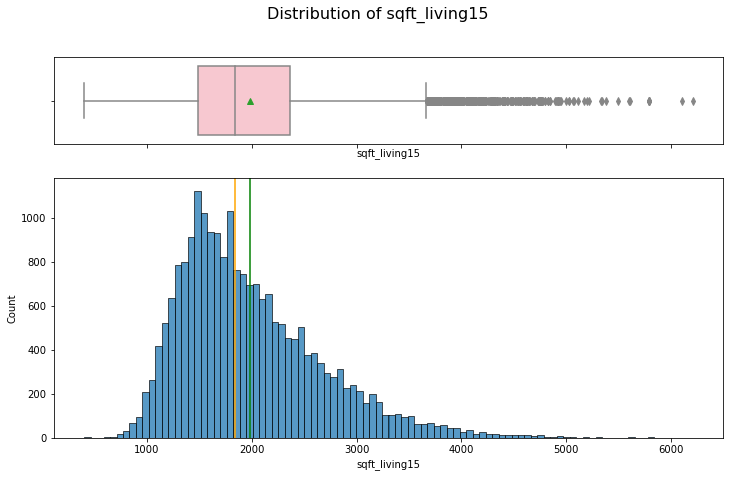

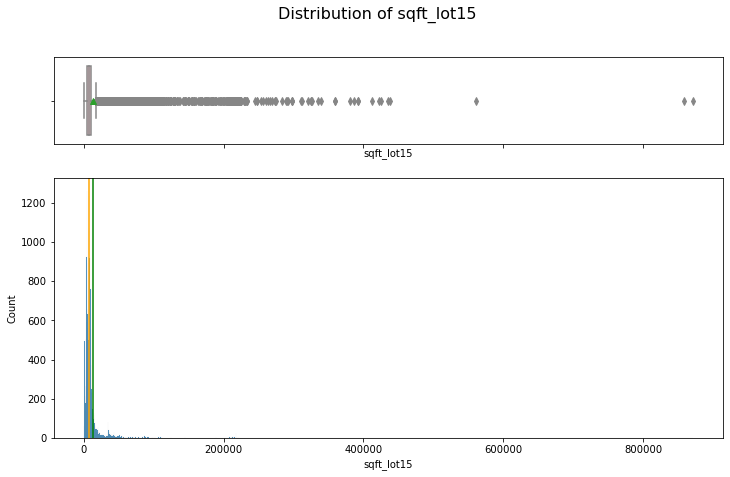

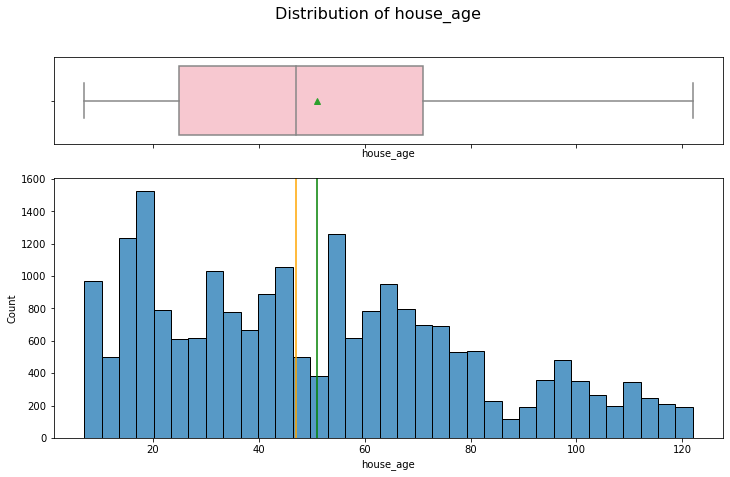

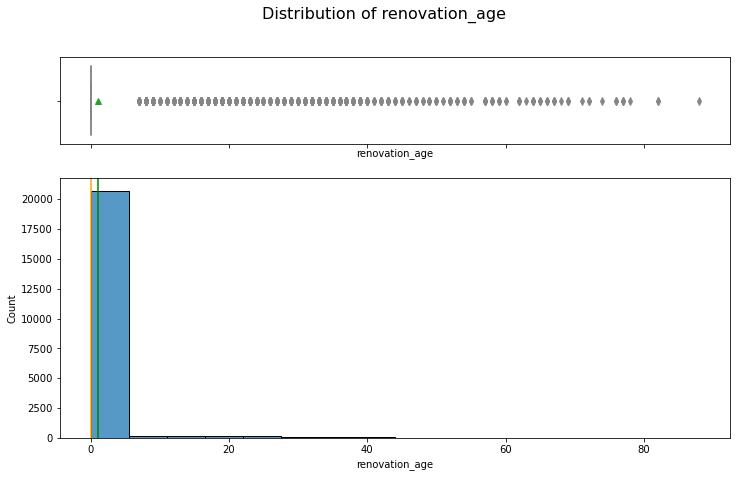

In [41]:
for i in cols_num:
    hist_box(data, i)

* `price` is right skewed, with outliers of prices over $1M..
* Most of the distributions are right skewed, but `sqft_lot` and `sqft_lot15` are strongly right skewed, and we will apply the log transformation
* `sqft_basement` and `yr_renovated` contain a large number of zeros.

### Categorical Features

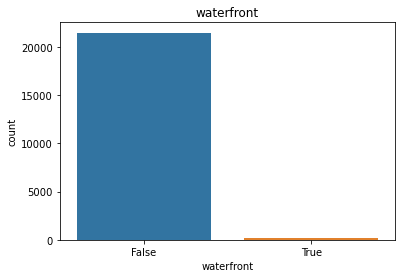

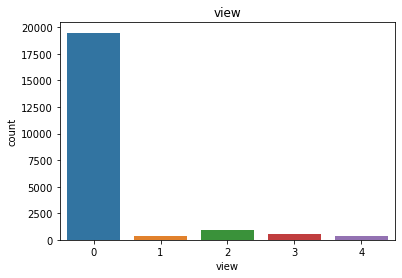

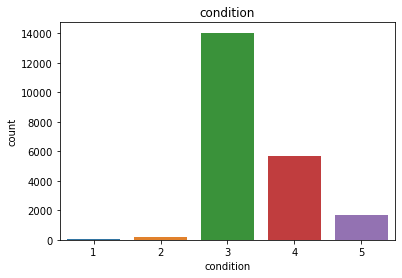

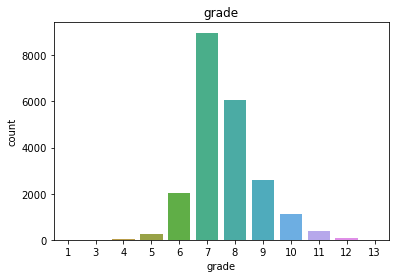

In [42]:
cols_cat = ["waterfront", "view", "condition", "grade"]

for i in cols_cat:
    sns.countplot(data = data, x = i);
    plt.title(i)
    plt.show()

* Most of the houses don't have water front or a good view
* Only a few houses are in low condition
* 7 and 8 are the most common grades.

## Bivariate Analysis

### Numerical vs Price

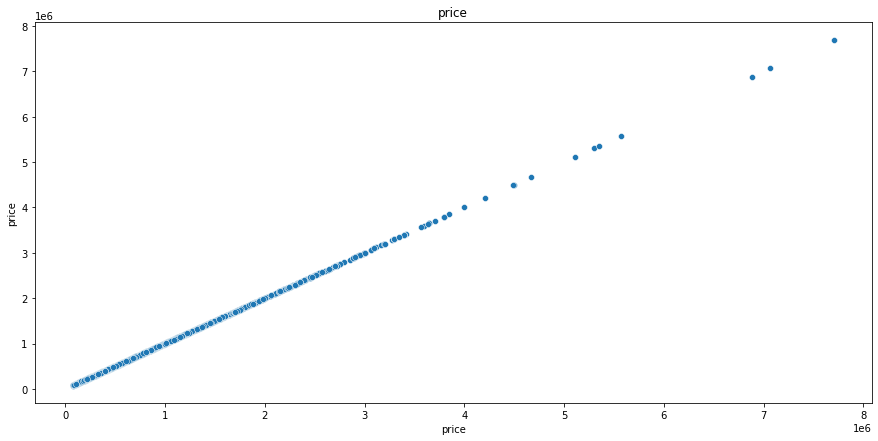

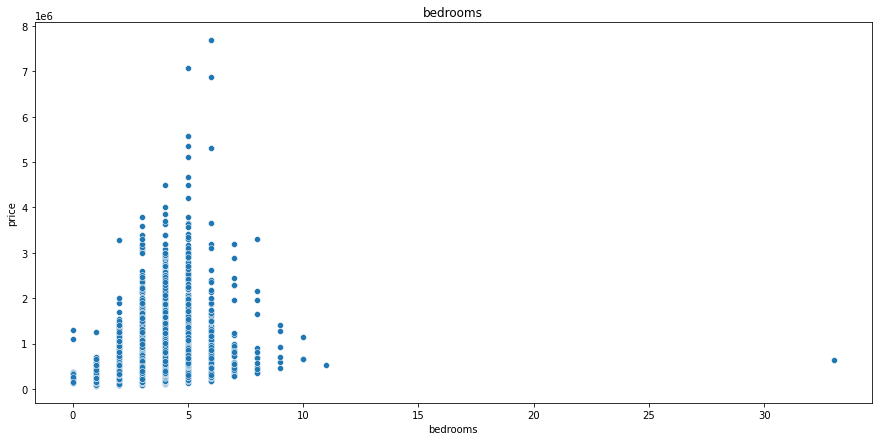

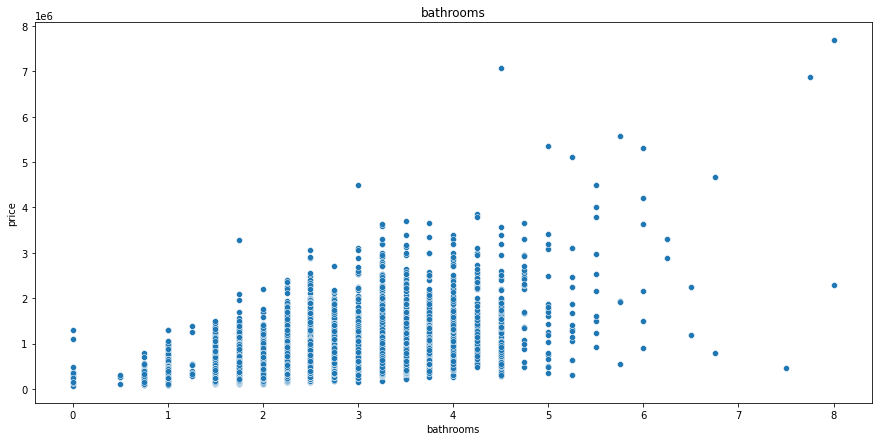

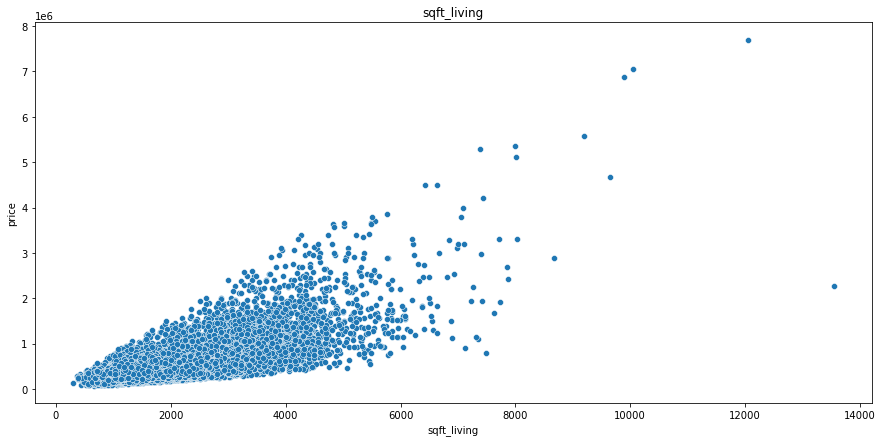

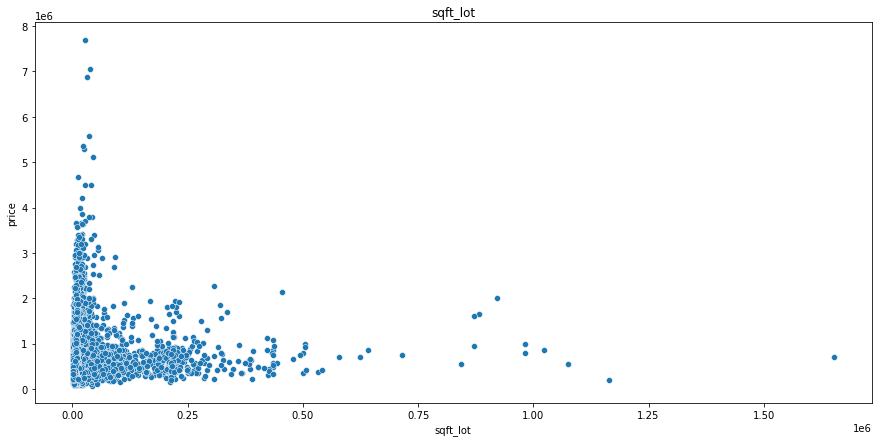

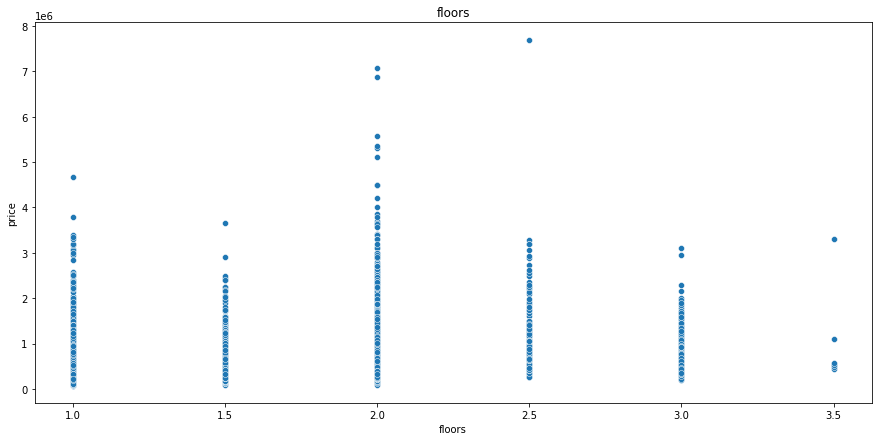

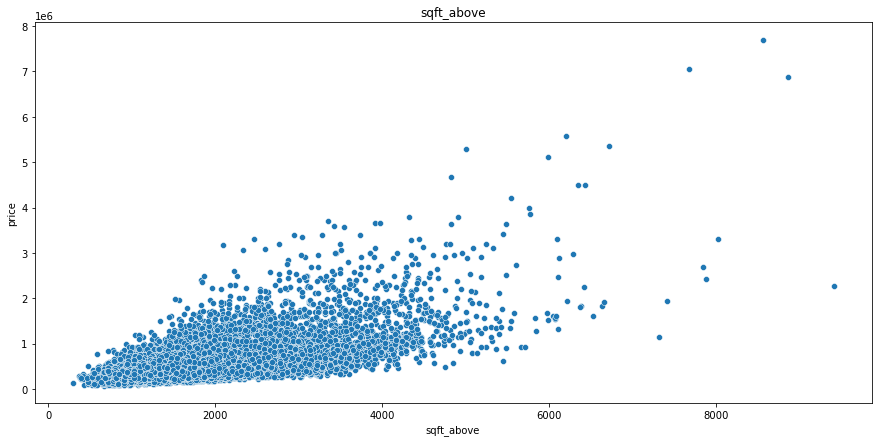

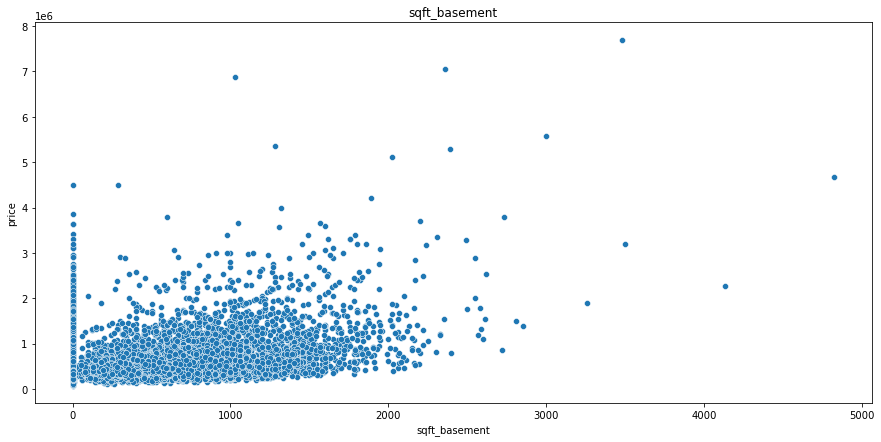

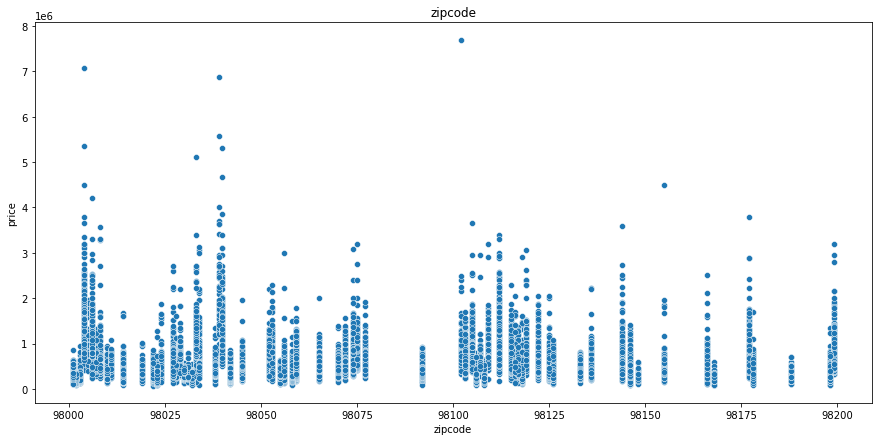

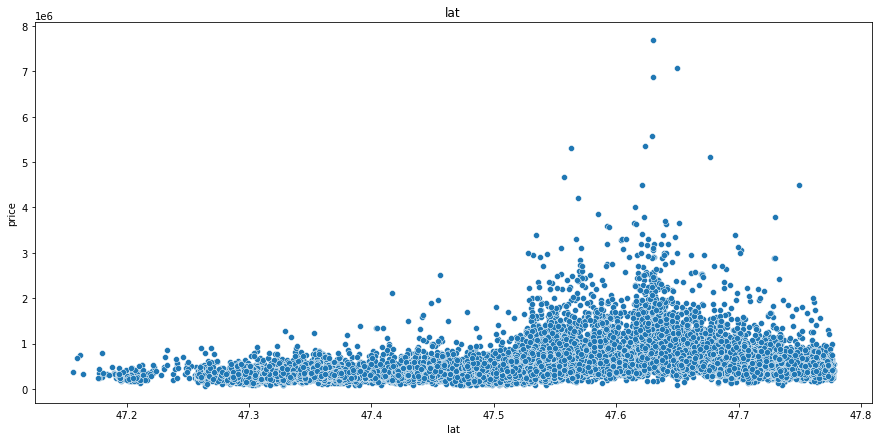

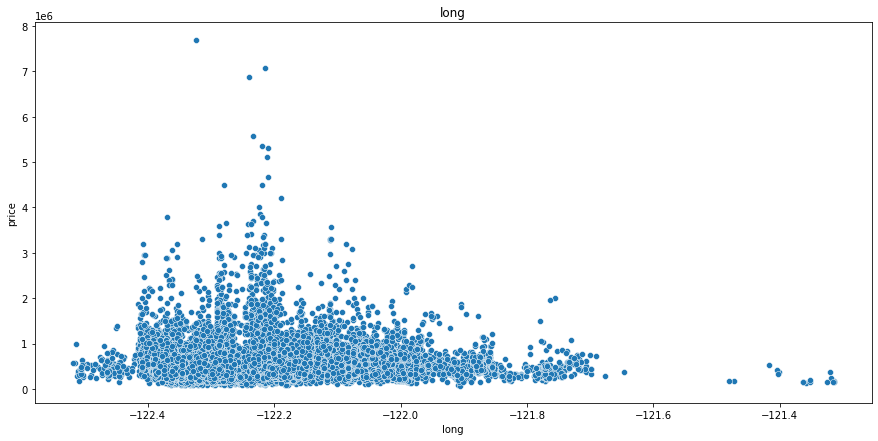

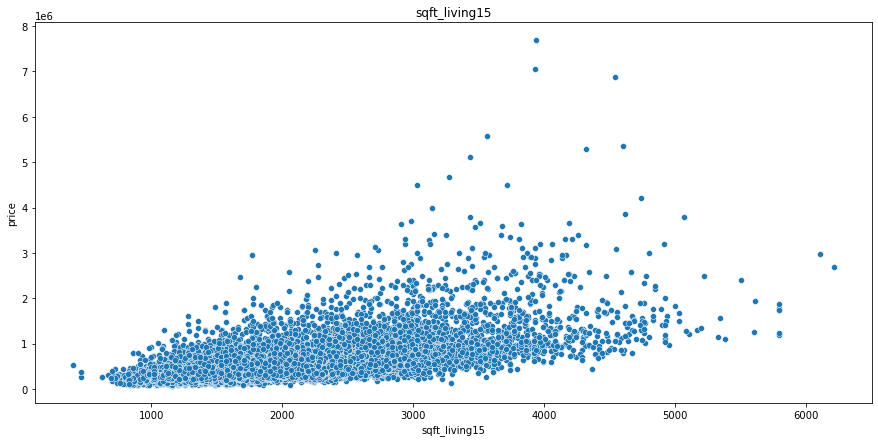

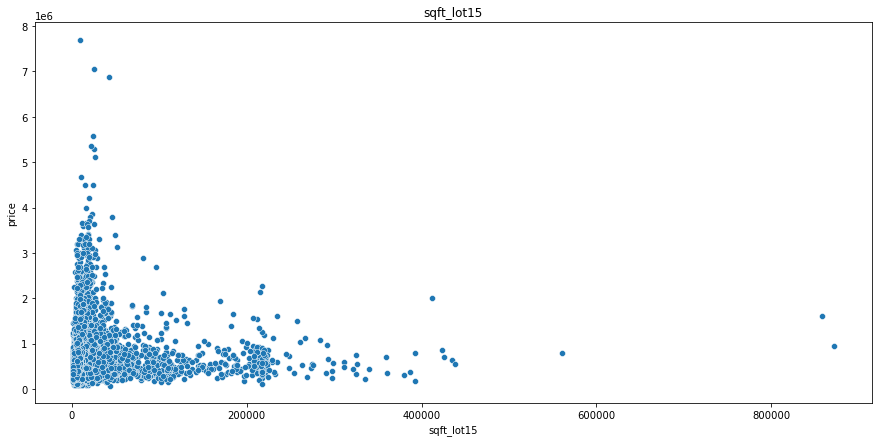

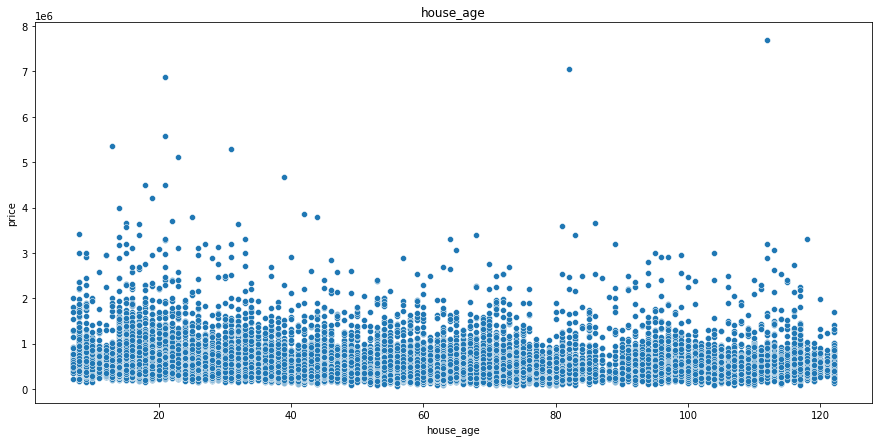

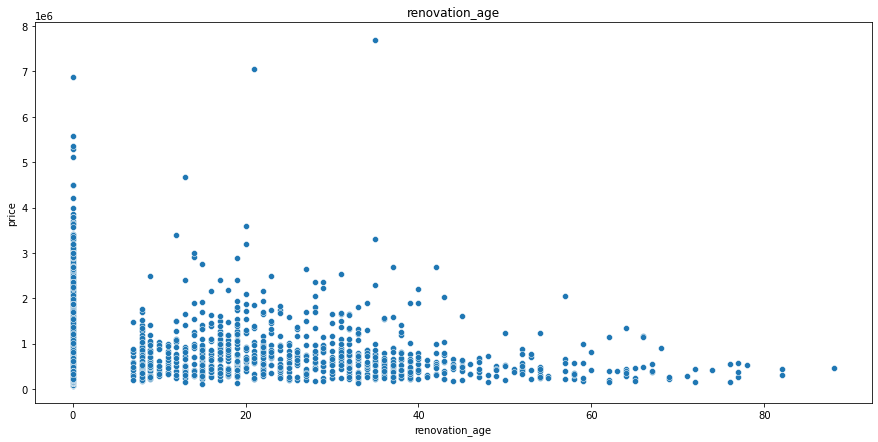

In [43]:
for i in cols_num:
    plt.figure(figsize = (15, 7))
    sns.scatterplot(data = data, x = i, y = "price")
    plt.title(i)
    plt.show()

* `price` seems to have a posite correlation with almost all the numerical variables, except for `floors`, `sqft_lot`, and `sqft_lot15`.
* Location (`lat`, `long`) also have an influency in the price of the houses.
* `sqft_lot` and `sqft_lot15` seem to have a non-linear relationship with price. A linear model will hardly capture their correlation.

### Categorical vs Price

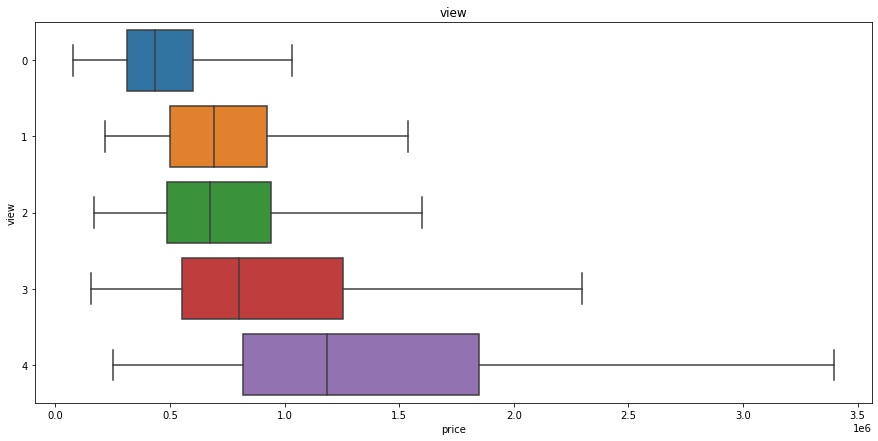

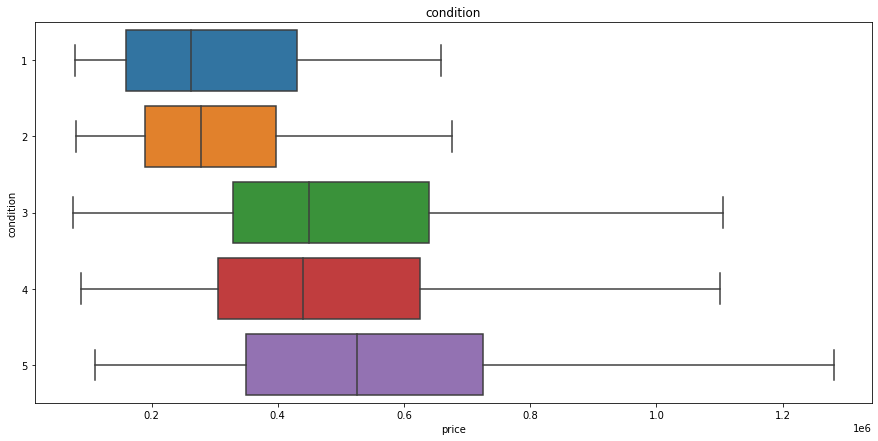

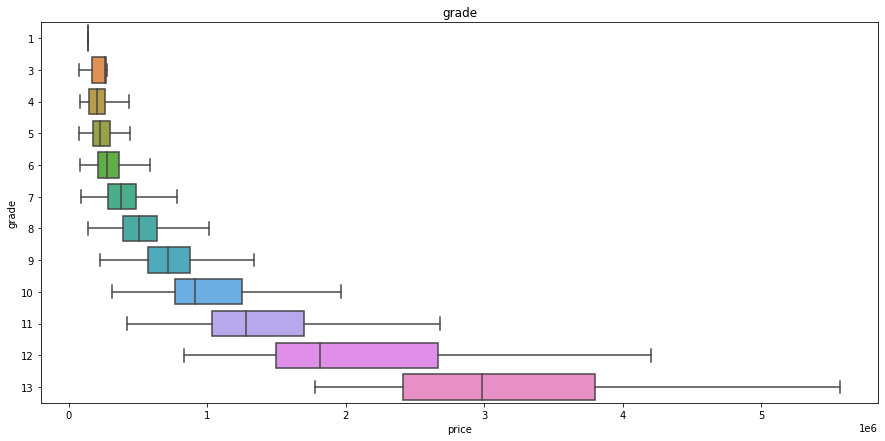

In [ ]:
for i in cat:
    plt.figure(figsize = (15, 7))
    sns.boxplot(data = data, x = "price", y = i, showfliers = False)
    plt.title(i)
    plt.show()

* Better the view, higher the price of the house
* When the houses are in better condition, they tend to be more expensive, however it seems not true for conditions 3 and 4
* Higher the grade of the house, higher the price is

### Log transformation

We will do the log transformation on the `sqft_lot` and `sqfr_lot15` columns

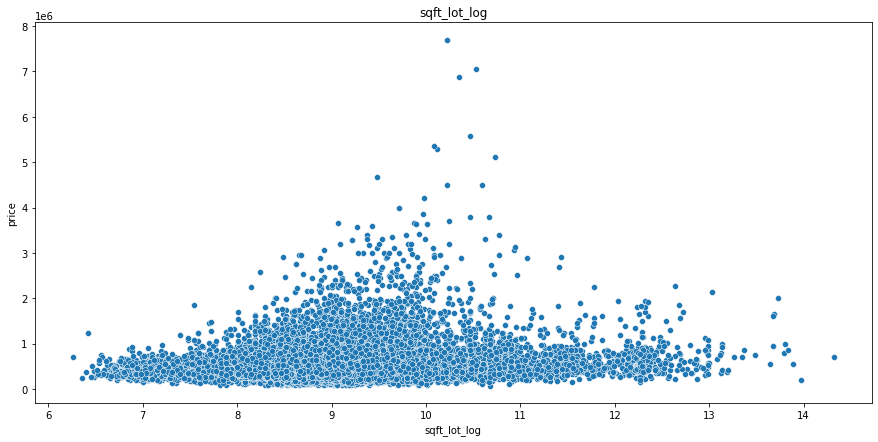

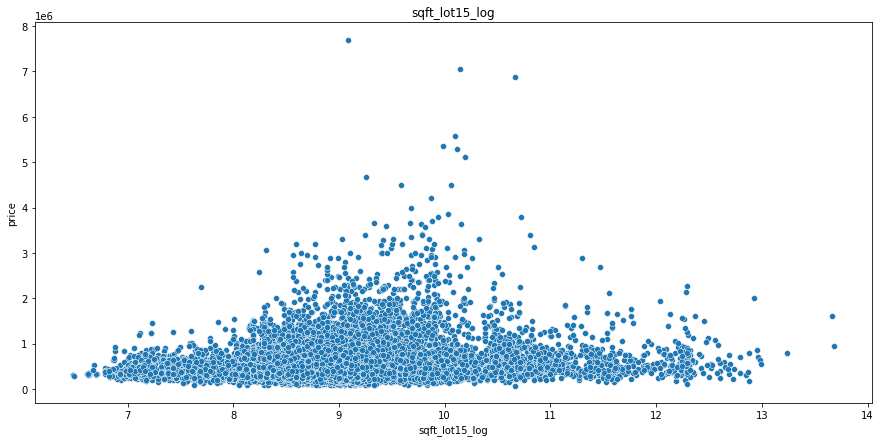

In [44]:
log_cols = ["sqft_lot", "sqft_lot15"]

for i in log_cols:
    data[i + "_log"] = np.log(data[i] + 1)
    plt.figure(figsize = (15, 7))
    sns.scatterplot(data = data, x = i + "_log", y = "price")
    plt.title(i + "_log")
    plt.show()

The log of `sqft_lot` and `sqft_lot15` now seems to have a positive correlation with the price of the house.

## Multivariate

### Correlation Plot

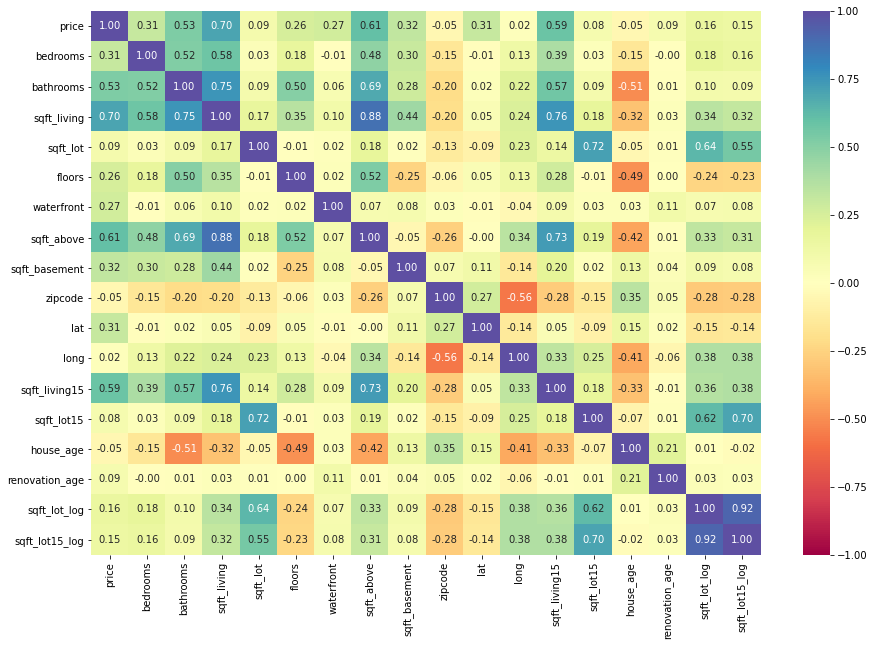

In [45]:
plt.figure(figsize = (15,10))
sns.heatmap(data = data.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "Spectral");

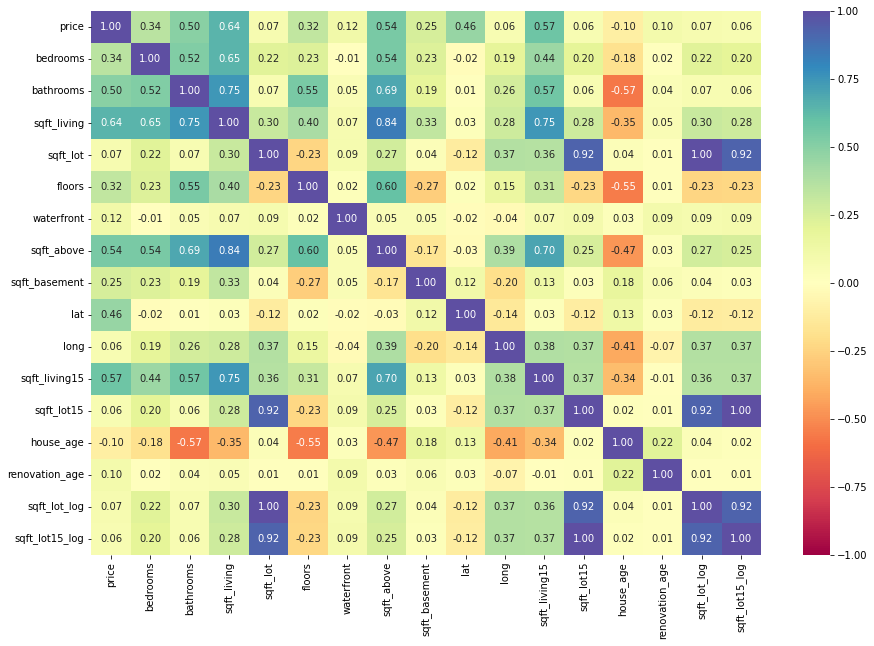

In [ ]:
plt.figure(figsize = (15,10))
sns.heatmap(data = data.corr(method = "spearman"), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = "Spectral");

* `price` has a relative high positive correlation with the size of the house, number of bedrooms and bathrooms, and number of floors.
* The square footage features have a high correlation with each other.

Let's drop the `sqft_lot` and `sqft_lot15` columns:

In [46]:
data.drop(columns = ["sqft_lot", "sqft_lot15"], inplace = True)

### Pair Plot

In [ ]:
# sns.pairplot(data = data.drop(columns = ["waterfront"]))

Similar interpretation as the correlation plot.

## Data Transformation

### One Hot Encoding

Let's do the one hof encoding of the categorical features

In [47]:
data = pd.get_dummies(data, drop_first = True)
data

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,zipcode,lat,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,221900.00,3,1.00,1180,1.00,False,1180,0,98178,47.51,...,0,0,0,1,0,0,0,0,0,0
1,538000.00,3,2.25,2570,2.00,False,2170,400,98125,47.72,...,0,0,0,1,0,0,0,0,0,0
2,180000.00,2,1.00,770,1.00,False,770,0,98028,47.74,...,0,0,1,0,0,0,0,0,0,0
3,604000.00,4,3.00,1960,1.00,False,1050,910,98136,47.52,...,0,0,0,1,0,0,0,0,0,0
4,510000.00,3,2.00,1680,1.00,False,1680,0,98074,47.62,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.00,3,2.50,1530,3.00,False,1530,0,98103,47.70,...,0,0,0,0,1,0,0,0,0,0
21609,400000.00,4,2.50,2310,2.00,False,2310,0,98146,47.51,...,0,0,0,0,1,0,0,0,0,0
21610,402101.00,2,0.75,1020,2.00,False,1020,0,98144,47.59,...,0,0,0,1,0,0,0,0,0,0
21611,400000.00,3,2.50,1600,2.00,False,1600,0,98027,47.53,...,0,0,0,0,1,0,0,0,0,0


# Regression

Meta-data:

In [78]:
features = list(data.drop("price", axis = 1))
target = "price"
print(features)

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'house_age', 'renovation_age', 'sqft_lot_log', 'sqft_lot15_log', 'view_1', 'view_2', 'view_3', 'view_4', 'condition_2', 'condition_3', 'condition_4', 'condition_5', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13']


## Splitting the data into train and test

In [79]:
temp, test = train_test_split(data, test_size = 0.2, random_state = 10)
train, val = train_test_split(temp, test_size = 0.25, random_state = 10)

print(train.shape[0], val.shape[0], test.shape[0], data.shape[0])

12967 4323 4323 21613


### Z-Transform

For most of the regression models, a kind of "distance" between features (from predicted values) and the target is calculated. Features commonly have different units, and numbers from one columns may be much larger than another, and those large columns will have a greater impact in the calculated distance (which may bias the model).

To avoid this, we can "normalize" the columns or try some kind of standardization, like the **z-transform**.

The **z-transform** standardize each columns by subtracting each element $x$ by the average of the columns and then divide by the standard deviation of the column:

$$z = \frac{x - u}{s}$$

where $u$ is the mean and $s$ is the standard deviation of the column.

### standardscaler target


In [82]:
# Reseting indexes
train.reset_index(inplace = True, drop = True)
test.reset_index(inplace = True, drop = True)
val.reset_index(inplace = True, drop = True)



# Creating the scaler operator
scaler = StandardScaler()

# Training and transforming the scaler for the training data
# axis one is column name and axis 0 is row
train = scaler.fit_transform(train)

# Transforming test
test = scaler.transform(test)
val = scaler.transform(val)

# Recovering the columns names
#train = pd.DataFrame(train)
train = pd.DataFrame(train, columns = scaler.feature_names_in_)
test = pd.DataFrame(test, columns = scaler.feature_names_in_)
val = pd.DataFrame(val, columns = scaler.feature_names_in_)


In [83]:
train.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,zipcode,lat,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,0.44,0.66,0.51,0.26,0.01,-0.09,-0.35,1.19,0.47,0.92,...,-0.03,-0.10,-0.32,1.19,-0.63,-0.37,-0.24,-0.13,-0.07,-0.02
1,0.66,-1.44,0.18,0.06,-0.91,-0.09,0.06,0.02,0.70,0.85,...,-0.03,-0.10,-0.32,-0.84,1.60,-0.37,-0.24,-0.13,-0.07,-0.02
2,-0.27,0.66,0.51,1.25,0.94,-0.09,1.00,0.72,-0.35,-0.48,...,-0.03,-0.10,-0.32,-0.84,1.60,-0.37,-0.24,-0.13,-0.07,-0.02
3,0.06,-0.39,-0.79,-0.08,-0.91,-0.09,0.26,-0.66,1.86,1.05,...,-0.03,-0.10,-0.32,-0.84,1.60,-0.37,-0.24,-0.13,-0.07,-0.02
4,-0.31,-0.39,0.18,-0.48,-0.91,-0.09,-0.82,0.54,-0.82,1.13,...,-0.03,-0.10,-0.32,1.19,-0.63,-0.37,-0.24,-0.13,-0.07,-0.02


In [ ]:
### targets are not standard scaler

In [64]:
# Reseting indexes
train.reset_index(inplace = True, drop = True)
test.reset_index(inplace = True, drop = True)
val.reset_index(inplace = True, drop = True)

# Saving the prices of the houses
temp1 = train["price"]
temp2 = test["price"]
temp3 = val["price"]

# Creating the scaler operator
scaler = StandardScaler()

# Training and transforming the scaler for the training data
# axis one is column name and axis 0 is row
train = scaler.fit_transform(train.drop("price", axis = 1))

# Transforming test
test = scaler.transform(test.drop("price", axis = 1))
val = scaler.transform(val.drop("price", axis = 1))

# Recovering the columns names
#train = pd.DataFrame(train)
train = pd.DataFrame(train, columns = scaler.feature_names_in_)
test = pd.DataFrame(test, columns = scaler.feature_names_in_)
val = pd.DataFrame(val, columns = scaler.feature_names_in_)

# Price back to dataframes
train["price"] = temp1
test["price"] = temp2
val["price"] = temp3

In [65]:
train.head()

,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,zipcode,lat,long,...,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13,price
0,0.66,0.51,0.26,0.01,-0.09,-0.35,1.19,0.47,0.92,-0.95,...,-0.10,-0.32,1.19,-0.63,-0.37,-0.24,-0.13,-0.07,-0.02,700000.00
1,-1.44,0.18,0.06,-0.91,-0.09,0.06,0.02,0.70,0.85,-0.44,...,-0.10,-0.32,-0.84,1.60,-0.37,-0.24,-0.13,-0.07,-0.02,779000.00
2,0.66,0.51,1.25,0.94,-0.09,1.00,0.72,-0.35,-0.48,0.41,...,-0.10,-0.32,-0.84,1.60,-0.37,-0.24,-0.13,-0.07,-0.02,440000.00
3,-0.39,-0.79,-0.08,-0.91,-0.09,0.26,-0.66,1.86,1.05,-1.10,...,-0.10,-0.32,-0.84,1.60,-0.37,-0.24,-0.13,-0.07,-0.02,560000.00
4,-0.39,0.18,-0.48,-0.91,-0.09,-0.82,0.54,-0.82,1.13,-0.16,...,-0.10,-0.32,1.19,-0.63,-0.37,-0.24,-0.13,-0.07,-0.02,425000.00


In [84]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
price,12967.00,0.00,1.00,-1.27,-0.60,-0.24,0.29,17.42
bedrooms,12967.00,0.00,1.00,-3.55,-0.39,-0.39,0.66,31.19
bathrooms,12967.00,-0.00,1.00,-2.73,-0.79,0.18,0.51,7.63
sqft_living,12967.00,-0.00,1.00,-1.86,-0.71,-0.19,0.51,12.50
floors,12967.00,-0.00,1.00,-0.91,-0.91,0.01,0.94,3.72
waterfront,12967.00,-0.00,1.00,-0.09,-0.09,-0.09,-0.09,11.34
sqft_above,12967.00,0.00,1.00,-1.71,-0.71,-0.27,0.50,9.21
sqft_basement,12967.00,0.00,1.00,-0.66,-0.66,-0.66,0.61,10.24
zipcode,12967.00,-0.00,1.00,-1.44,-0.84,-0.24,0.74,2.28
lat,12967.00,0.00,1.00,-2.91,-0.64,0.09,0.85,1.56


In [85]:
val.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,zipcode,lat,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,3.46,0.66,1.80,2.60,-0.91,-0.09,0.93,3.66,-0.73,0.53,...,-0.03,-0.10,-0.32,-0.84,-0.63,2.70,-0.24,-0.13,-0.07,-0.02
1,-0.85,0.66,-0.79,-0.55,-0.91,-0.09,-0.26,-0.66,-1.42,-1.84,...,-0.03,-0.10,3.08,-0.84,-0.63,-0.37,-0.24,-0.13,-0.07,-0.02
2,-0.82,0.66,0.18,-0.39,-0.91,-0.09,-0.08,-0.66,-1.03,-1.75,...,-0.03,-0.10,-0.32,-0.84,1.60,-0.37,-0.24,-0.13,-0.07,-0.02
3,-0.43,-0.39,0.51,0.16,0.94,-0.09,0.53,-0.66,-1.44,-1.99,...,-0.03,-0.10,-0.32,-0.84,1.60,-0.37,-0.24,-0.13,-0.07,-0.02
4,-0.44,0.66,-0.47,0.20,0.01,-0.09,-0.51,1.37,-0.41,-0.35,...,-0.03,-0.10,-0.32,1.19,-0.63,-0.37,-0.24,-0.13,-0.07,-0.02


In [86]:
test.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,sqft_above,sqft_basement,zipcode,lat,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
0,-0.59,-0.39,-0.47,0.03,-0.91,-0.09,0.38,-0.66,-0.67,-1.44,...,-0.03,-0.10,-0.32,1.19,-0.63,-0.37,-0.24,-0.13,-0.07,-0.02
1,0.41,0.66,-0.14,0.17,0.01,-0.09,-0.33,0.97,1.24,0.12,...,-0.03,-0.10,-0.32,1.19,-0.63,-0.37,-0.24,-0.13,-0.07,-0.02
2,-1.09,-3.55,-2.73,-1.95,-0.91,-0.09,-1.80,-0.66,-1.01,-0.22,...,-0.03,-0.10,-0.32,-0.84,-0.63,-0.37,-0.24,-0.13,-0.07,-0.02
3,0.06,-0.39,0.51,-0.75,2.80,-0.09,-0.47,-0.66,0.47,0.63,...,-0.03,-0.10,-0.32,-0.84,1.60,-0.37,-0.24,-0.13,-0.07,-0.02
4,0.02,0.66,-0.14,-0.41,-0.91,-0.09,-1.13,1.26,0.74,0.91,...,-0.03,-0.10,3.08,-0.84,-0.63,-0.37,-0.24,-0.13,-0.07,-0.02


## Linear Regression

In [87]:
# Creating the model
model_lr = LinearRegression()

# Training the model on the train data
model_lr.fit(train[features], train[target])

LinearRegression()

Let's check how the model behaves on the train data:

In [88]:
# Calculating predictions
pred = model_lr.predict(train[features])

# Metrics
print("R2 Score:", r2_score(train[target], pred))
print("MSE:", mean_squared_error(train[target], pred))
print("Expl. Var.:", explained_variance_score(train[target], pred))

R2 Score: 0.7346615469455284
MSE: 0.26533845305447157
Expl. Var.: 0.7346615470606797


### Metrics DataFrame

In [89]:
def regression_metrics(model, data, features = features, target = target):

    # Computing prediction
    pred = model.predict(data[features])

    # Computing metrics
    r2 = r2_score(data[target], pred)
    mse = mean_squared_error(data[target], pred)
    evs = explained_variance_score(data[target], pred)

    # DataFrame
    df = pd.DataFrame([r2, mse, evs], index = ["R2 Score", "MSE", "Exp. Var."], columns = ["Values"])
    
    return df
    

In [102]:
print("Train Data")
regression_metrics(model_lr, train.drop([2,4288]))

Train Data


,Values
R2 Score,0.73
MSE,0.27
Exp. Var.,0.73


In [101]:
print("Validation Data")
regression_metrics(model_lr, val.drop([2,4288]))

Validation Data


,Values
R2 Score,0.73
MSE,0.27
Exp. Var.,0.73


In [100]:
print("Test Data")
regression_metrics(model_lr, test.drop([2,4288]))

Test Data


,Values
R2 Score,0.73
MSE,0.30
Exp. Var.,0.73


What happened to the test predictions?

In [92]:
tmp = pd.DataFrame({"True": test[target].values, "Predictions": model_lr.predict(test[features]), "error": (test[target].values)-(model_lr.predict(test[features]))})
tmp

,True,Predictions,error
0,-0.59,-0.54,-0.06
1,0.41,0.09,0.32
2,-1.09,202449637477.70,-202449637478.79
3,0.06,-0.29,0.35
4,0.02,-0.10,0.12
...,...,...,...
4318,-0.42,-0.41,-0.00
4319,-0.53,0.06,-0.59
4320,1.68,1.13,0.55
4321,0.23,-0.22,0.44


In [93]:
tmp.describe().T

,count,mean,std,min,25%,50%,75%,max
True,4323.00,0.00,1.05,-1.26,-0.59,-0.25,0.27,19.66
Predictions,4323.00,46830820.59,3079104196.74,-1.63,-0.53,-0.19,0.27,202449637477.70
error,4323.00,-46830820.59,3079104196.76,-202449637478.79,-0.23,-0.02,0.20,11.26


In [94]:
tmp[tmp.Predictions < 0 ]

,True,Predictions,error
0,-0.59,-0.54,-0.06
3,0.06,-0.29,0.35
4,0.02,-0.10,0.12
5,-0.77,-1.27,0.50
7,-0.64,-0.52,-0.13
...,...,...,...
4315,-0.72,-1.00,0.28
4316,-0.38,-0.76,0.38
4318,-0.42,-0.41,-0.00
4321,0.23,-0.22,0.44


Apparently, the model predicted one price very wrong.

In [95]:
test.iloc[4288,:]

price            -0.06
bedrooms         -1.44
bathrooms        -1.44
sqft_living      -1.35
floors           -0.91
waterfront       -0.09
sqft_above       -1.15
sqft_basement    -0.66
zipcode          -0.14
lat              -1.25
long             -1.91
sqft_living15    -0.88
house_age        -1.20
renovation_age   -0.18
sqft_lot_log      3.22
sqft_lot15_log    3.59
view_1           -0.13
view_2           -0.22
view_3           -0.16
view_4           -0.12
condition_2      -0.09
condition_3       0.74
condition_4      -0.60
condition_5      -0.29
grade_3          -0.02
grade_4          -0.03
grade_5           9.94
grade_6          -0.32
grade_7          -0.84
grade_8          -0.63
grade_9          -0.37
grade_10         -0.24
grade_11         -0.13
grade_12         -0.07
grade_13         -0.02
Name: 4288, dtype: float64

The data looks good for this point...

Apparently, there is some non-linear relationship not properly captured by the model for this house. Let's drop it to check the metrics.

In [96]:
print("Test Data")
regression_metrics(model_lr, test.drop([2,4288]))

Test Data


,Values
R2 Score,0.73
MSE,0.30
Exp. Var.,0.73


Without this specific house, the metrics are good.

In [103]:
model_lr.intercept_

3.4013090475700746e-06

In [104]:
pd.DataFrame(model_lr.coef_, index = features, columns = ["Weights"])

,Weights
bedrooms,-0.05
bathrooms,0.08
sqft_living,97420345899.69
floors,-0.01
waterfront,0.12
sqft_above,-87982494447.51
sqft_basement,-46981020144.96
zipcode,-0.09
lat,0.22
long,-0.07


## Support Vector Regressor

First, let's try the linear SVR.

In [106]:
model_linearsvr = LinearSVR(loss = 'squared_epsilon_insensitive', random_state = 10, dual = False)

model_linearsvr.fit(train[features], train[target])

LinearSVR(dual=False, loss='squared_epsilon_insensitive', random_state=10)

Checking the metrics:

In [107]:
print("Train Data")
print(regression_metrics(model_linearsvr, train))
print(20 * "-")

print("Valilation Data")
print(regression_metrics(model_linearsvr, val))
print(20 * "-")

print("Test Data")
print(regression_metrics(model_linearsvr, test))
print(20 * "-")

Train Data
           Values
R2 Score     0.73
MSE          0.27
Exp. Var.    0.73
--------------------
Valilation Data
           Values
R2 Score     0.73
MSE          0.27
Exp. Var.    0.73
--------------------
Test Data
           Values
R2 Score     0.73
MSE          0.30
Exp. Var.    0.73
--------------------


Similar results as the linear regression, and without the strange prediction in the test data.

In [108]:
print(model_linearsvr.intercept_)
print(model_lr.intercept_)

[2.66196758e-17]
3.4013090475700746e-06


In [109]:
pd.DataFrame(model_linearsvr.coef_, index = features, columns = ["Weights"])

,Weights
bedrooms,-0.05
bathrooms,0.08
sqft_living,0.18
floors,-0.01
waterfront,0.12
sqft_above,0.17
sqft_basement,0.06
zipcode,-0.09
lat,0.22
long,-0.07


## Neural Networks

Now let's try a non-linear model to predict the price of the houses:

In [110]:
model_nn = MLPRegressor(
    hidden_layer_sizes = (32, 16, 8),
    activation = "relu",
    solver = "lbfgs",
    max_iter = 500,
    early_stopping = True,
    n_iter_no_change = 10,
    random_state = 10
).fit(train[features], train[target])

print("Train Data")
print(regression_metrics(model_nn, train))
print(20 * "-")

print("Valilation Data")
print(regression_metrics(model_nn, val))
print(20 * "-")

print("Test Data")
print(regression_metrics(model_nn, test))
print(20 * "-")

Train Data
           Values
R2 Score     0.95
MSE          0.05
Exp. Var.    0.95
--------------------
Valilation Data
           Values
R2 Score     0.86
MSE          0.14
Exp. Var.    0.86
--------------------
Test Data
           Values
R2 Score     0.79
MSE          0.23
Exp. Var.    0.79
--------------------


The neural networks model has a better performance than the linear regression and linear SVR.

### Plot True vs Predictions

In [ ]:
# !pip install matplotlib==3.5.2

Text(0.5, 1.0, 'Linear Regression')

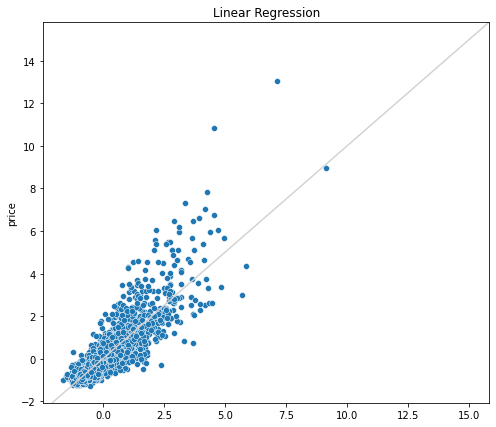

In [117]:
plt.figure(figsize = (8,7))
plt.axline((0,0), (15, 15), color = "lightgray")
sns.scatterplot(model_lr.predict(val[features]), val[target])
plt.title("Linear Regression")

Text(0.5, 1.0, 'Linear SVR')

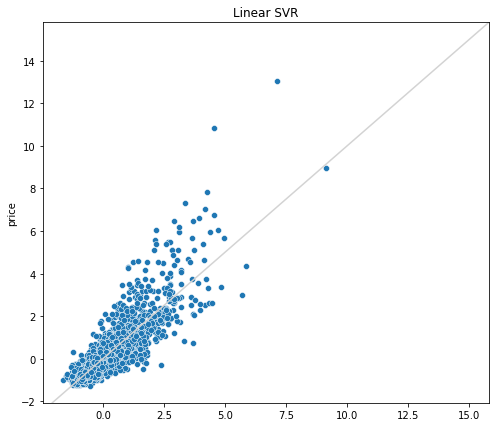

In [118]:
plt.figure(figsize = (8,7))
plt.axline((0,0), (15, 15), color = "lightgray")
sns.scatterplot(model_linearsvr.predict(val[features]), val[target])
plt.title("Linear SVR")

Text(0.5, 1.0, 'Neural Networks')

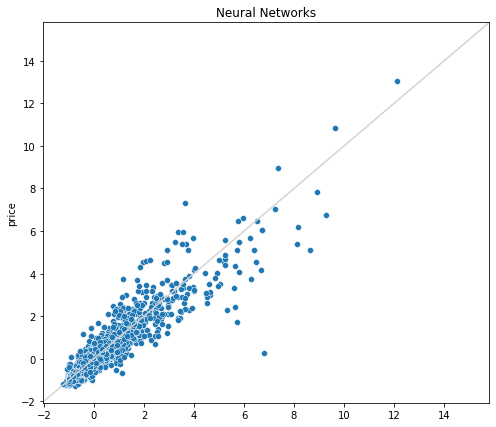

In [119]:
plt.figure(figsize = (8,7))
plt.axline((0,0), (15, 15), color = "lightgray")
sns.scatterplot(model_nn.predict(val[features]), val[target])
plt.title("Neural Networks")

# Summary

## EDA

* We removed some columns not used for the modeling.
* Size of the house and number of bedroom and bathroom showed to be great differentiators in the price of the houses.
* Location has influence in the price of the house.
* The categorical features (waterfront, view, condition, and grade) also showed high influence in the price of the house.
* sqft_lot and sqft_lot15 were transformed with a log transform, showing a better linear correlation with the price.
* We applied the one-hot encoding on the categorical features.
* The z-transformed was used to bring all the features with different units to the same scale

## Regression

* Linear regression worked fine, with good metrics, but with 1 strange prediction.
* The linearSVR had similar metrics as the linear regression, and showed to be more stable.
* The neural networks was the one with the best performance, showing that the housing price is not a strict linear problem.